# **Решение MISIS Dark horse**

## **Библиотеки**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import shap
import numpy as np

from sklearn.metrics import roc_auc_score, precision_score, recall_score
from sklearn.model_selection import train_test_split

from catboost import CatBoostClassifier


from tqdm import tqdm
tqdm.pandas()
pd.set_option('display.max_columns', 120)
pd.set_option('display.float_format', '{:.2f}'.format)

## **Загрузка данных**

In [4]:
train_df = pd.read_parquet("./data/train_data.pqt")
test_df = pd.read_parquet("./data/test_data.pqt")

In [5]:
train_df.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,ogrn_days_end_quarter,ogrn_month,ogrn_year,ft_registration_date,max_founderpres,min_founderpres,ogrn_exist_months,okved,segment,sum_of_paym_2m,sum_of_paym_6m,sum_of_paym_1y,sum_a_oper_1m,cnt_a_oper_1m,sum_b_oper_1m,cnt_b_oper_1m,sum_c_oper_1m,cnt_c_oper_1m,sum_deb_d_oper_1m,cnt_deb_d_oper_1m,sum_cred_d_oper_1m,cnt_cred_d_oper_1m,sum_deb_e_oper_1m,cnt_deb_e_oper_1m,cnt_days_deb_e_oper_1m,sum_cred_e_oper_1m,cnt_cred_e_oper_1m,cnt_days_cred_e_oper_1m,sum_deb_f_oper_1m,cnt_deb_f_oper_1m,cnt_days_deb_f_oper_1m,sum_cred_f_oper_1m,cnt_cred_f_oper_1m,cnt_days_cred_f_oper_1m,sum_deb_g_oper_1m,cnt_deb_g_oper_1m,cnt_days_deb_g_oper_1m,sum_cred_g_oper_1m,cnt_cred_g_oper_1m,cnt_days_cred_g_oper_1m,sum_deb_h_oper_1m,cnt_deb_h_oper_1m,cnt_days_deb_h_oper_1m,sum_cred_h_oper_1m,cnt_cred_h_oper_1m,cnt_days_cred_h_oper_1m,sum_a_oper_3m,cnt_a_oper_3m,sum_b_oper_3m,cnt_b_oper_3m,sum_c_oper_3m,cnt_c_oper_3m,sum_deb_d_oper_3m,cnt_deb_d_oper_3m,sum_cred_d_oper_3m,cnt_cred_d_oper_3m,sum_deb_e_oper_3m,cnt_deb_e_oper_3m,cnt_days_deb_e_oper_3m,sum_cred_e_oper_3m,cnt_cred_e_oper_3m,cnt_days_cred_e_oper_3m,sum_deb_f_oper_3m,cnt_deb_f_oper_3m,cnt_days_deb_f_oper_3m,sum_cred_f_oper_3m,cnt_cred_f_oper_3m,cnt_days_cred_f_oper_3m,sum_deb_g_oper_3m,cnt_deb_g_oper_3m,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster,end_cluster
0,0,month_1,0.74,0.71,1.29,0.75,channel_code_5,city_23,city_type_0,index_city_code_39,-0.49,-0.14,ogrn_month_0,ogrn_year_1,2.45,2.74,2.93,2.44,okved_30,segment_1,0.94,0.54,0.51,-0.19,0.42,-0.03,0.44,-0.10,0.55,-0.13,0.97,-0.06,0.22,0.40,0.89,0.46,0.51,0.87,0.62,-0.13,0.77,0.21,-0.02,0.15,0.78,-0.04,0.51,0.85,0.10,0.23,0.39,1.05,0.65,0.39,1.17,0.65,0.66,-0.21,0.21,-0.03,0.52,-0.12,0.96,-0.14,0.87,-0.08,0.31,0.36,0.43,1.20,0.44,0.86,1.27,-0.15,0.29,0.89,-0.03,0.25,0.04,-0.04,0.46,0.73,0.19,0.95,0.57,0.90,0.55,0.77,0.94,0.30,0.97,"{α, γ}",{other}
1,0,month_2,1.05,0.83,2.46,1.05,channel_code_5,city_23,city_type_0,index_city_code_39,-0.49,-0.14,ogrn_month_0,ogrn_year_1,2.47,2.76,2.95,2.46,okved_30,segment_1,0.65,0.54,0.49,-0.19,0.42,-0.03,0.44,-0.10,0.55,-0.09,0.97,-0.06,0.22,0.13,0.89,0.40,0.10,0.87,0.53,-0.10,0.77,0.24,-0.02,0.15,0.78,-0.04,0.51,0.85,-0.02,0.22,0.33,0.42,0.65,0.26,0.41,0.63,0.56,-0.21,0.21,-0.03,0.52,-0.12,0.96,-0.13,0.87,-0.08,0.31,0.30,0.43,1.14,0.41,0.86,1.24,-0.14,0.29,0.90,-0.03,0.25,0.04,-0.04,0.46,0.73,0.13,0.95,0.50,0.79,0.55,0.70,0.99,0.30,0.95,"{α, γ}",{other}
2,0,month_3,0.69,0.74,0.43,0.70,channel_code_5,city_23,city_type_0,index_city_code_39,-0.49,-0.14,ogrn_month_0,ogrn_year_1,2.49,2.77,2.97,2.47,okved_30,segment_1,0.40,0.61,0.48,-0.19,0.42,-0.03,0.44,-0.10,0.55,-0.13,0.97,-0.06,0.22,0.49,0.89,0.56,0.15,0.87,0.62,-0.13,0.77,0.21,-0.02,0.15,0.78,-0.04,0.51,0.85,-0.03,0.22,0.29,1.25,0.65,0.39,0.55,0.63,0.66,-0.21,0.21,-0.03,0.52,-0.12,0.96,-0.13,0.87,-0.08,0.31,0.35,0.43,1.12,0.28,0.86,1.23,-0.14,0.29,0.90,-0.03,0.25,0.04,-0.04,0.46,0.73,0.03,0.95,0.44,0.88,0.55,0.66,0.81,0.29,0.96,"{α, γ}",{other}


In [6]:
test_df.head(3)

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,index_city_code,ogrn_days_end_month,ogrn_days_end_quarter,ogrn_month,ogrn_year,ft_registration_date,max_founderpres,min_founderpres,ogrn_exist_months,okved,segment,sum_of_paym_2m,sum_of_paym_6m,sum_of_paym_1y,sum_a_oper_1m,cnt_a_oper_1m,sum_b_oper_1m,cnt_b_oper_1m,sum_c_oper_1m,cnt_c_oper_1m,sum_deb_d_oper_1m,cnt_deb_d_oper_1m,sum_cred_d_oper_1m,cnt_cred_d_oper_1m,sum_deb_e_oper_1m,cnt_deb_e_oper_1m,cnt_days_deb_e_oper_1m,sum_cred_e_oper_1m,cnt_cred_e_oper_1m,cnt_days_cred_e_oper_1m,sum_deb_f_oper_1m,cnt_deb_f_oper_1m,cnt_days_deb_f_oper_1m,sum_cred_f_oper_1m,cnt_cred_f_oper_1m,cnt_days_cred_f_oper_1m,sum_deb_g_oper_1m,cnt_deb_g_oper_1m,cnt_days_deb_g_oper_1m,sum_cred_g_oper_1m,cnt_cred_g_oper_1m,cnt_days_cred_g_oper_1m,sum_deb_h_oper_1m,cnt_deb_h_oper_1m,cnt_days_deb_h_oper_1m,sum_cred_h_oper_1m,cnt_cred_h_oper_1m,cnt_days_cred_h_oper_1m,sum_a_oper_3m,cnt_a_oper_3m,sum_b_oper_3m,cnt_b_oper_3m,sum_c_oper_3m,cnt_c_oper_3m,sum_deb_d_oper_3m,cnt_deb_d_oper_3m,sum_cred_d_oper_3m,cnt_cred_d_oper_3m,sum_deb_e_oper_3m,cnt_deb_e_oper_3m,cnt_days_deb_e_oper_3m,sum_cred_e_oper_3m,cnt_cred_e_oper_3m,cnt_days_cred_e_oper_3m,sum_deb_f_oper_3m,cnt_deb_f_oper_3m,cnt_days_deb_f_oper_3m,sum_cred_f_oper_3m,cnt_cred_f_oper_3m,cnt_days_cred_f_oper_3m,sum_deb_g_oper_3m,cnt_deb_g_oper_3m,cnt_days_deb_g_oper_3m,sum_cred_g_oper_3m,cnt_cred_g_oper_3m,cnt_days_cred_g_oper_3m,sum_deb_h_oper_3m,cnt_deb_h_oper_3m,cnt_days_deb_h_oper_3m,sum_cred_h_oper_3m,cnt_cred_h_oper_3m,cnt_days_cred_h_oper_3m,start_cluster
0,200000,month_4,-0.10,0.34,-0.13,-0.10,channel_code_12,city_14,city_type_0,None,-1.53,-1.68,ogrn_month_8,ogrn_year_11,-0.65,NaN,NaN,-0.66,okved_0,segment_3,0.42,0.33,0.68,0.53,0.42,-0.03,0.44,1.12,0.55,-0.13,0.97,-0.06,0.22,0.28,0.89,0.82,0.27,0.87,0.53,4.59,0.77,0.24,-0.02,0.15,0.78,-0.03,0.52,0.91,0.08,0.23,0.33,-0.14,0.65,0.29,0.41,0.61,0.50,0.96,0.21,-0.03,0.52,1.66,0.96,-0.14,0.87,-0.06,0.31,0.18,0.43,1.37,0.14,0.86,0.95,3.14,0.29,0.90,-0.03,0.25,0.04,0.03,0.46,0.85,0.01,0.95,0.41,-0.15,0.55,0.54,0.03,0.26,0.56,{α}
1,200000,month_5,-0.02,-0.06,-0.12,-0.02,channel_code_12,city_14,city_type_0,None,-1.53,-1.68,ogrn_month_8,ogrn_year_11,-0.64,NaN,NaN,-0.64,okved_0,segment_3,0.43,0.28,0.69,-0.07,0.42,-0.03,0.44,4.98,0.56,-0.13,0.97,0.09,0.22,0.12,0.89,0.85,0.13,0.87,0.53,1.40,0.77,0.24,-0.02,0.15,0.78,-0.01,0.51,0.88,-0.03,0.22,0.29,-0.15,0.65,0.19,0.36,0.61,0.53,1.00,0.22,-0.03,0.52,3.02,0.96,-0.14,0.87,-0.01,0.31,0.20,0.43,1.41,0.19,0.86,1.06,3.14,0.29,0.91,-0.03,0.25,0.04,0.00,0.46,0.81,0.01,0.95,0.40,-0.15,0.55,0.55,0.24,0.26,0.72,{α}
2,200000,month_6,0.05,0.05,-0.13,0.05,channel_code_12,city_14,city_type_0,None,-1.53,-1.68,ogrn_month_8,ogrn_year_11,-0.62,NaN,NaN,-0.62,okved_0,segment_3,0.22,0.29,0.67,2.70,0.43,-0.03,0.44,4.19,0.56,-0.13,0.97,-0.06,0.22,-0.00,0.89,0.75,0.09,0.87,0.53,-0.17,0.77,0.18,-0.02,0.15,0.78,0.00,0.52,0.91,-0.03,0.22,0.29,-0.15,0.65,0.19,0.22,0.61,0.47,1.18,0.22,-0.03,0.52,4.16,0.97,-0.14,0.87,-0.01,0.31,0.15,0.43,1.47,0.19,0.86,1.17,2.47,0.29,0.90,-0.03,0.25,0.04,-0.01,0.46,0.78,0.01,0.95,0.40,-0.15,0.55,0.54,0.39,0.27,0.84,None


In [7]:
train_df.columns

Index(['id', 'date', 'balance_amt_avg', 'balance_amt_max', 'balance_amt_min',
       'balance_amt_day_avg', 'channel_code', 'city', 'city_type',
       'index_city_code', 'ogrn_days_end_month', 'ogrn_days_end_quarter',
       'ogrn_month', 'ogrn_year', 'ft_registration_date', 'max_founderpres',
       'min_founderpres', 'ogrn_exist_months', 'okved', 'segment',
       'sum_of_paym_2m', 'sum_of_paym_6m', 'sum_of_paym_1y', 'sum_a_oper_1m',
       'cnt_a_oper_1m', 'sum_b_oper_1m', 'cnt_b_oper_1m', 'sum_c_oper_1m',
       'cnt_c_oper_1m', 'sum_deb_d_oper_1m', 'cnt_deb_d_oper_1m',
       'sum_cred_d_oper_1m', 'cnt_cred_d_oper_1m', 'sum_deb_e_oper_1m',
       'cnt_deb_e_oper_1m', 'cnt_days_deb_e_oper_1m', 'sum_cred_e_oper_1m',
       'cnt_cred_e_oper_1m', 'cnt_days_cred_e_oper_1m', 'sum_deb_f_oper_1m',
       'cnt_deb_f_oper_1m', 'cnt_days_deb_f_oper_1m', 'sum_cred_f_oper_1m',
       'cnt_cred_f_oper_1m', 'cnt_days_cred_f_oper_1m', 'sum_deb_g_oper_1m',
       'cnt_deb_g_oper_1m', 'cnt_days_de

In [8]:
mask = train_df.isna().sum()
mask[mask > 0]

balance_amt_avg             65577
balance_amt_max             65577
balance_amt_min             65577
balance_amt_day_avg         65577
channel_code                42850
                            ...  
cnt_days_cred_g_oper_3m    165252
cnt_deb_h_oper_3m          165252
cnt_days_deb_h_oper_3m     165252
cnt_cred_h_oper_3m         165252
cnt_days_cred_h_oper_3m    165252
Length: 63, dtype: int64

## **Обработка и чистка датасета**

### Функция для группироки пропусков и добавления новых признаков о пропусках

In [9]:
def null_group_feature(train_df1, test_df1):
    
    def get_group(df1):
        df = df1.copy()
        missing_values = df.isnull().sum()
        missing_values = missing_values[missing_values != 0]
        missing_value_counts = missing_values.value_counts()
        repeated_missing_values = missing_value_counts[missing_value_counts >= 2].index
        columns_with_repeated_missing_values_train = missing_values[missing_values.isin(repeated_missing_values)]
        missing_values_df = columns_with_repeated_missing_values_train.reset_index()
        missing_values_df.columns = ['column_name', 'missing_values']
        grouped_df = missing_values_df.groupby('missing_values')['column_name'].apply(list)
        return grouped_df.tolist()

    train_df, test_df = train_df1.copy(), test_df1.copy()
    group_train = get_group(train_df)
    group_test = get_group(test_df)
    common = []
    for i in group_test:
        for j in group_train:
            if i == j:
                common.append(i)
    for i, columns in enumerate(common):
        train_df[f'has_missing_{i}'] = train_df[columns].isnull().any(axis=1).astype(int)
    
    for i, columns in enumerate(common):
        test_df[f'has_missing_{i}'] = test_df[columns].isnull().any(axis=1).astype(int)
        
    train_df['missing_values_count'] = train_df.isnull().sum(axis=1)
    test_df['missing_values_count'] = test_df.isnull().sum(axis=1)
    return train_df, test_df

Применим функцию к нашим датасетам

In [ ]:
train_df, test_df = null_group_feature(train_df, test_df)

### Список продуктов в кластерах

In [10]:
products = [cl[1:-1].split(',') for cl in train_df.start_cluster.value_counts().index]
products = [pr.strip() for cl in products for pr in cl]
products = set(products)
products, len(products)

({'', 'other', 'α', 'β', 'γ', 'δ', 'ε', 'η', 'θ', 'λ', 'μ', 'π', 'ψ'}, 13)

### Функция для заполнения пропусков

In [11]:
fill_mode_dict = {}
delta, min_val = 0, 0
def clear_dataset(df_, train=True):
    df = df_.copy()
    global delta, min_val, products
    # заполняем модой столбцы balance, count, sum
    columns = df.columns
    balance_col = columns[columns.str.contains('balance_amt_')].to_list()
    count_col = columns[columns.str.contains('cnt_')].to_list()
    sum_col = columns[columns.str.contains('sum_')].to_list()
    
    fill_mode_col = balance_col + count_col + sum_col
    
    for col in fill_mode_col:
        if train:
            df[col] = df[col].fillna(df[col].mode()[0])
            fill_mode_dict[col] = df[col].mode()[0]
        else:
            df[col] = df[col].fillna(fill_mode_dict[col])
        
        
        
    # заполняем city, ogrn
    orgn_col = columns[columns.str.contains('ogrn')].to_list()
    city_col = columns[columns.str.contains('city')].to_list()
    ffill_col = ['channel_code', 'segment']
    bfill_col = ['okved']
    
    fill_ffill_col = city_col + ffill_col
    fill_bfill_col = orgn_col + bfill_col   
    
    for col in fill_ffill_col:
        df[col] = df.groupby('id')[col].ffill()
        df[col] = df.groupby('id')[col].bfill()
        
    for col in fill_bfill_col:
        df[col] = df.groupby('id')[col].bfill()
        
        
        
    #удалим индекс почтовый
    df.drop(['index_city_code', 'max_founderpres', 'min_founderpres', 'ogrn_exist_months'], axis=1, inplace=True) 
    
    
    
    #city_type to int
    df['city_type'] = df['city_type'].map(lambda x: int(x.split('_')[-1]) if type(x) == str else x)
    
    
    
    #ft_registration_date заполнить шагом delta
    if train:
        delta = df.groupby('id').ft_registration_date.agg(lambda x: x.diff().mean()).mean()
        min_val = df['ft_registration_date'].min()
    def fill_delta(x):
        if np.isnan(x).all() or not np.isnan(x).any():
            return x
        if x.shape[0] == 3:
            if not np.isnan(x.iloc[0]):
                x.iloc[1] = x.iloc[0] + delta
                x.iloc[2] = x.iloc[1] + delta
            elif not np.isnan(x.iloc[1]):
                x.iloc[0] = min(x.iloc[1] - delta, min_val)
                x.iloc[2] = x.iloc[1] + delta
            elif not np.isnan(x.iloc[2]):
                x.iloc[1] = min(x.iloc[2] - delta, min_val)
                x.iloc[0] = min(x.iloc[1] - delta, min_val)
        else:
            if not np.isnan(x.iloc[0]):
                x.iloc[1] = x.iloc[0] + delta
            elif not np.isnan(x.iloc[1]):
                x.iloc[0] = min(x.iloc[1] - delta, min_val)
        return x
    df['ft_registration_date'] = df.groupby('id').ft_registration_date.progress_transform(lambda x: fill_delta(x))
    
    if not train:
        df['start_cluster'] =  df.groupby('id').start_cluster.ffill()

    # mean past    
    new_fill_mode_col = [col + '_mean' for col in fill_mode_col]
    df[new_fill_mode_col] = df.groupby('id')[fill_mode_col].progress_transform(lambda x: x.expanding().mean())

    
    #cluster to product
    for pt in products:
        df[pt] = df.start_cluster.map(lambda x: 1 if sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0)
#     df = df.drop('start_cluster', axis=1)
    
    
    cat_cols = df.select_dtypes(include=['object', 'category']).columns
    df.loc[:, cat_cols] = df.loc[:, cat_cols].fillna('None')
    df[cat_cols] = df[cat_cols].astype("category")
    
        
    return df

Приеним эту функцию к датасетам

In [12]:
train_clear_df = clear_dataset(train_df)
test_clear_df = clear_dataset(test_df, train=False)

100%|██████████| 200000/200000 [11:16<00:00, 295.56it/s]
/tmp/ipykernel_34/4253181142.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_fill_mode_col] = df.groupby('id')[fill_mode_col].progress_transform(lambda x: x.expanding().mean())
/tmp/ipykernel_34/4253181142.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[new_fill_mode_col] = df.groupby('id')[fill_mode_col].progress_transform(lambda x: x.expanding().mean())
/tmp/ipykernel_34/4253181142.py:81: PerformanceWarning: DataFrame is highly fragmented.  This is us

## **Функция для новых признаков**

In [13]:
def operations_usage_feature(df_ : pd.DataFrame, train = True):
    df = df_.copy()
    
    columns_for_1_month = [f'cnt_{operation}_oper_1m' for operation in ['a', 'b', 'c']]  
    modes_1 = df[columns_for_1_month].mode().iloc[0]
    columns_for_1_month_input = [f'cnt_cred_{operations}_oper_1m' for operations in ['d', 'e', 'f', 'g', 'h']]
    modes_2 = df[columns_for_1_month_input].mode().iloc[0]
    columns_for_1_month_output = [f'cnt_deb_{operations}_oper_1m' for operations in ['d', 'e', 'f', 'g', 'h']]
    modes_3 = df[columns_for_1_month_output].mode().iloc[0]
    
    
    columns_for_3_month = [f'cnt_{operation}_oper_3m' for operation in ['a', 'b', 'c']] 
    modes_4 = df[columns_for_3_month].mode().iloc[0]
    columns_for_3_month_input = [f'cnt_cred_{operations}_oper_3m' for operations in ['d', 'e', 'f', 'g', 'h']]
    modes_5 = df[columns_for_3_month_input].mode().iloc[0]
    columns_for_3_month_output = [f'cnt_deb_{operations}_oper_3m' for operations in ['d', 'e', 'f', 'g', 'h']]
    modes_6 = df[columns_for_3_month_output].mode().iloc[0]
    

    df['small_operation_usage_1m'] = 0
    df['input_operation_usage_1m'] = 0
    df['output_operation_usage_1m'] = 0
    
    df['small_operation_usage_3m'] = 0
    df['input_operation_usage_3m'] = 0
    df['output_operation_usage_3m'] = 0
    
    
    for col in columns_for_1_month:
        df.loc[df[col] != modes_1[col], 'small_operation_usage_1m'] += 1
    
    for col in columns_for_1_month_input:
        df.loc[df[col] != modes_2[col], 'input_operation_usage_1m'] += 1
    
    for col in columns_for_1_month_output:
        df.loc[df[col] != modes_3[col], 'output_operation_usage_1m'] += 1
        
    for col in columns_for_3_month:
        df.loc[df[col] != modes_4[col], 'small_operation_usage_3m'] += 1
        
    for col in columns_for_3_month_input:
        df.loc[df[col] != modes_5[col], 'input_operation_usage_3m'] += 1
        
    for col in columns_for_3_month_output:
        df.loc[df[col] != modes_6[col], 'output_operation_usage_3m'] += 1
    
    return df

Приеним эту функцию к датасетам

In [14]:
train_clear_df = operations_usage_feature(train_clear_df)
test_clear_df = operations_usage_feature(test_clear_df, train=False)

In [15]:
def change_class_feature(df_ : pd.DataFrame, train = True):
    df = df_.copy()
    
    df['change_cluster'] = 0
    df.loc[(df['id'] == df['id'].shift()) & (df['start_cluster'] != df['start_cluster'].shift()), 'change_cluster'] = 1
    df['change_cluster'] = df.groupby('id')['change_cluster'].cumsum()
    
    return df

Приеним эту функцию к датасетам

In [16]:
train_clear_df = change_class_feature(train_clear_df)
test_clear_df = change_class_feature(test_clear_df, train=False)

In [17]:
train_clear_df

,id,date,balance_amt_avg,balance_amt_max,balance_amt_min,balance_amt_day_avg,channel_code,city,city_type,ogrn_days_end_month,ogrn_days_end_quarter,ogrn_month,ogrn_year,ft_registration_date,okved,segment,sum_of_paym_2m,sum_of_paym_6m,sum_of_paym_1y,sum_a_oper_1m,cnt_a_oper_1m,sum_b_oper_1m,cnt_b_oper_1m,sum_c_oper_1m,cnt_c_oper_1m,sum_deb_d_oper_1m,cnt_deb_d_oper_1m,sum_cred_d_oper_1m,cnt_cred_d_oper_1m,sum_deb_e_oper_1m,cnt_deb_e_oper_1m,cnt_days_deb_e_oper_1m,sum_cred_e_oper_1m,cnt_cred_e_oper_1m,cnt_days_cred_e_oper_1m,sum_deb_f_oper_1m,cnt_deb_f_oper_1m,cnt_days_deb_f_oper_1m,sum_cred_f_oper_1m,cnt_cred_f_oper_1m,cnt_days_cred_f_oper_1m,sum_deb_g_oper_1m,cnt_deb_g_oper_1m,cnt_days_deb_g_oper_1m,sum_cred_g_oper_1m,cnt_cred_g_oper_1m,cnt_days_cred_g_oper_1m,sum_deb_h_oper_1m,cnt_deb_h_oper_1m,cnt_days_deb_h_oper_1m,sum_cred_h_oper_1m,cnt_cred_h_oper_1m,cnt_days_cred_h_oper_1m,sum_a_oper_3m,cnt_a_oper_3m,sum_b_oper_3m,cnt_b_oper_3m,sum_c_oper_3m,cnt_c_oper_3m,sum_deb_d_oper_3m,...,cnt_days_deb_f_oper_3m_mean,cnt_cred_f_oper_3m_mean,cnt_days_cred_f_oper_3m_mean,cnt_deb_g_oper_3m_mean,cnt_days_deb_g_oper_3m_mean,cnt_cred_g_oper_3m_mean,cnt_days_cred_g_oper_3m_mean,cnt_deb_h_oper_3m_mean,cnt_days_deb_h_oper_3m_mean,cnt_cred_h_oper_3m_mean,cnt_days_cred_h_oper_3m_mean,sum_of_paym_2m_mean,sum_of_paym_6m_mean,sum_of_paym_1y_mean,sum_a_oper_1m_mean,sum_b_oper_1m_mean,sum_c_oper_1m_mean,sum_deb_d_oper_1m_mean,sum_cred_d_oper_1m_mean,sum_deb_e_oper_1m_mean,sum_cred_e_oper_1m_mean,sum_deb_f_oper_1m_mean,sum_cred_f_oper_1m_mean,sum_deb_g_oper_1m_mean,sum_cred_g_oper_1m_mean,sum_deb_h_oper_1m_mean,sum_cred_h_oper_1m_mean,sum_a_oper_3m_mean,sum_b_oper_3m_mean,sum_c_oper_3m_mean,sum_deb_d_oper_3m_mean,sum_cred_d_oper_3m_mean,sum_deb_e_oper_3m_mean,sum_cred_e_oper_3m_mean,sum_deb_f_oper_3m_mean,sum_cred_f_oper_3m_mean,sum_deb_g_oper_3m_mean,sum_cred_g_oper_3m_mean,sum_deb_h_oper_3m_mean,sum_cred_h_oper_3m_mean,,η,β,μ,ε,γ,θ,ψ,π,α,δ,λ,other,small_operation_usage_1m,input_operation_usage_1m,output_operation_usage_1m,small_operation_usage_3m,input_operation_usage_3m,output_operation_usage_3m,change_cluster
0,0,month_1,0.74,0.71,1.29,0.75,channel_code_5,city_23,0.00,-0.49,-0.14,ogrn_month_0,ogrn_year_1,2.45,okved_30,segment_1,0.94,0.54,0.51,-0.19,0.42,-0.03,0.44,-0.10,0.55,-0.13,0.97,-0.06,0.22,0.40,0.89,0.46,0.51,0.87,0.62,-0.13,0.77,0.21,-0.02,0.15,0.78,-0.04,0.51,0.85,0.10,0.23,0.39,1.05,0.65,0.39,1.17,0.65,0.66,-0.21,0.21,-0.03,0.52,-0.12,0.96,-0.14,...,0.89,0.25,0.04,0.46,0.73,0.95,0.57,0.55,0.77,0.30,0.97,0.94,0.54,0.51,-0.19,-0.03,-0.10,-0.13,-0.06,0.40,0.51,-0.13,-0.02,-0.04,0.10,1.05,1.17,-0.21,-0.03,-0.12,-0.14,-0.08,0.36,0.44,-0.15,-0.03,-0.04,0.19,0.90,0.94,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,3,0,3,3,0
1,0,month_2,1.05,0.83,2.46,1.05,channel_code_5,city_23,0.00,-0.49,-0.14,ogrn_month_0,ogrn_year_1,2.47,okved_30,segment_1,0.65,0.54,0.49,-0.19,0.42,-0.03,0.44,-0.10,0.55,-0.09,0.97,-0.06,0.22,0.13,0.89,0.40,0.10,0.87,0.53,-0.10,0.77,0.24,-0.02,0.15,0.78,-0.04,0.51,0.85,-0.02,0.22,0.33,0.42,0.65,0.26,0.41,0.63,0.56,-0.21,0.21,-0.03,0.52,-0.12,0.96,-0.13,...,0.90,0.25,0.04,0.46,0.73,0.95,0.53,0.55,0.74,0.30,0.96,0.79,0.54,0.50,-0.19,-0.03,-0.10,-0.11,-0.06,0.26,0.30,-0.11,-0.02,-0.04,0.04,0.74,0.79,-0.21,-0.03,-0.12,-0.14,-0.08,0.33,0.42,-0.15,-0.03,-0.04,0.16,0.84,0.96,0,0,0,0,0,1,0,0,0,1,0,0,0,0,3,4,0,3,4,0
2,0,month_3,0.69,0.74,0.43,0.70,channel_code_5,city_23,0.00,-0.49,-0.14,ogrn_month_0,ogrn_year_1,2.49,okved_30,segment_1,0.40,0.61,0.48,-0.19,0.42,-0.03,0.44,-0.10,0.55,-0.13,0.97,-0.06,0.22,0.49,0.89,0.56,0.15,0.87,0.62,-0.13,0.77,0.21,-0.02,0.15,0.78,-0.04,0.51,0.85,-0.03,0.22,0.29,1.25,0.65,0.39,0.55,0.63,0.66,-0.21,0.21,-0.03,0.52,-0.12,0.96,-0.13,...,0.90,0.25,0.04,0.46,0.73,0.95,0.50,0.55,0.71,0.30,0.96,0.66,0.56,0.49,-0.19,-0.03,-0.10,-0.12,-0.06,0.34,0.25,-0.12,-0.02,-0.04,0.02,0.91,0.71,-0.21,-0.03,-0.12,-0.13,-0.08,0.34,0.38,-0.15,-0.03,-0.04,0.12,0.85,0.91,0,0,0,0,0,1,0,0,0,1,0,0,0,0,2,3,0,3,4,0
3,1,month_1,-0.08,-0.09,-0.11,-0.0

## **Уберем выбросы из датасета**

In [75]:
train_clear_df_temp = train_clear_df.copy()
test_clear_df_temp = test_clear_df.copy()
print(train_clear_df_temp.shape)
def remove_outliers(df1, column):
    df = df1.copy();
    Q1 = df[column].quantile(0.25);
    Q3 = df[column].quantile(0.75);
    IQR = Q3 - Q1;
    filter = (df[column] >= Q1 - 300 * IQR) & (df[column] <= Q3 + 300 *IQR);
    return df.loc[filter]  ;

numerical_columns = train_clear_df_temp.select_dtypes(include=[np.number]).columns.tolist();

for column in numerical_columns:
    train_clear_df_temp = train_clear_df_temp.groupby('start_cluster', observed=True).apply(remove_outliers, column=column)
    train_clear_df_temp = train_clear_df_temp.reset_index(drop=True);
    train_clear_df_temp = train_clear_df_temp.sort_values(['id', 'date']);


(600000, 191)


/tmp/ipykernel_34/2390043575.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_clear_df_temp = train_clear_df_temp.groupby('start_cluster', observed=True).apply(remove_outliers, column=column)
/tmp/ipykernel_34/2390043575.py:15: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  train_clear_df_temp = train_clear_df_temp.groupby('start_cluster', observed=True).apply(remove_outliers, column=column)
/tmp/i

In [129]:
print(train_clear_df2.shape)

(548285, 191)


## **Обучение модели**

In [139]:
train_clear_df2 = train_clear_df[train_clear_df['missing_values_count'] < 50].drop(columns=['start_cluster'])

In [140]:
def split_Xy(df_, train=True):
    df = df_.copy()

    if train:
        X = df.drop(["id", "date", "end_cluster"], axis=1) 
        y = df["end_cluster"]
    else:
        X = df.drop(["id", "date"], axis=1) 
        y = None

    return X, y

In [141]:
X, y = split_Xy(train_clear_df2)

In [142]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_test, y_test, test_size=0.5, random_state=42, stratify=y_test)

In [143]:
def weighted_roc_auc(y_true, y_pred, labels, weights_dict):
    unnorm_weights = np.array([weights_dict[label] for label in labels])
    weights = unnorm_weights / unnorm_weights.sum()
    classes_roc_auc = roc_auc_score(y_true, y_pred, labels=sorted(labels),
                                    multi_class="ovr", average=None)
    return sum(weights * classes_roc_auc)

cluster_weights = pd.read_excel("cluster_weights.xlsx").set_index("cluster")
weights_dict = cluster_weights["unnorm_weight"].to_dict()

In [144]:
cat_cols = list(x_train.select_dtypes(include=['object', 'category']).columns)

model = CatBoostClassifier(loss_function='MultiClass',
                           eval_metric='AUC',
                           metric_period=10, 
                           verbose=500, 
                           random_seed=42,
                           task_type='GPU',
                           iterations=4000,
                           depth=4,
                           allow_writing_files=False,
                           class_weights=weights_dict)

model.fit(x_train, y_train, cat_features=cat_cols, eval_set = (x_val, y_val))

Learning rate set to 0.10303


AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	test: 0.7197608	best: 0.7197608 (0)	total: 213ms	remaining: 14m 12s
500:	test: 0.9561079	best: 0.9561079 (500)	total: 22s	remaining: 2m 33s
1000:	test: 0.9615682	best: 0.9617442 (980)	total: 42.7s	remaining: 2m 7s
1500:	test: 0.9641622	best: 0.9641622 (1500)	total: 1m 4s	remaining: 1m 47s
2000:	test: 0.9653500	best: 0.9653500 (2000)	total: 1m 25s	remaining: 1m 24s
2500:	test: 0.9663765	best: 0.9663868 (2470)	total: 1m 46s	remaining: 1m 3s
3000:	test: 0.9672863	best: 0.9672863 (3000)	total: 2m 6s	remaining: 42.1s
3500:	test: 0.9678977	best: 0.9679766 (3310)	total: 2m 26s	remaining: 20.8s
3999:	test: 0.9682513	best: 0.9682733 (3990)	total: 2m 47s	remaining: 0us
bestTest = 0.96827333
bestIteration = 3990
Shrink model to first 3991 iterations.


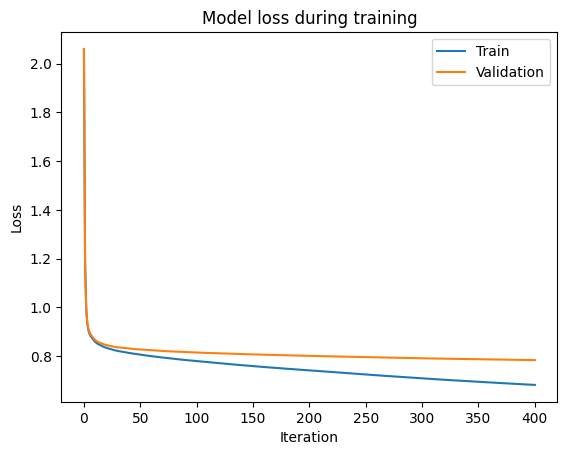

In [146]:
# Plot model loss during training
evals_result = model.get_evals_result()
plt.plot(evals_result['learn']['MultiClass'], label='Train')
plt.plot(evals_result['validation']['MultiClass'], label='Validation')
plt.title('Model loss during training')
plt.ylabel('Loss')
plt.xlabel('Iteration')
plt.legend()
plt.show()

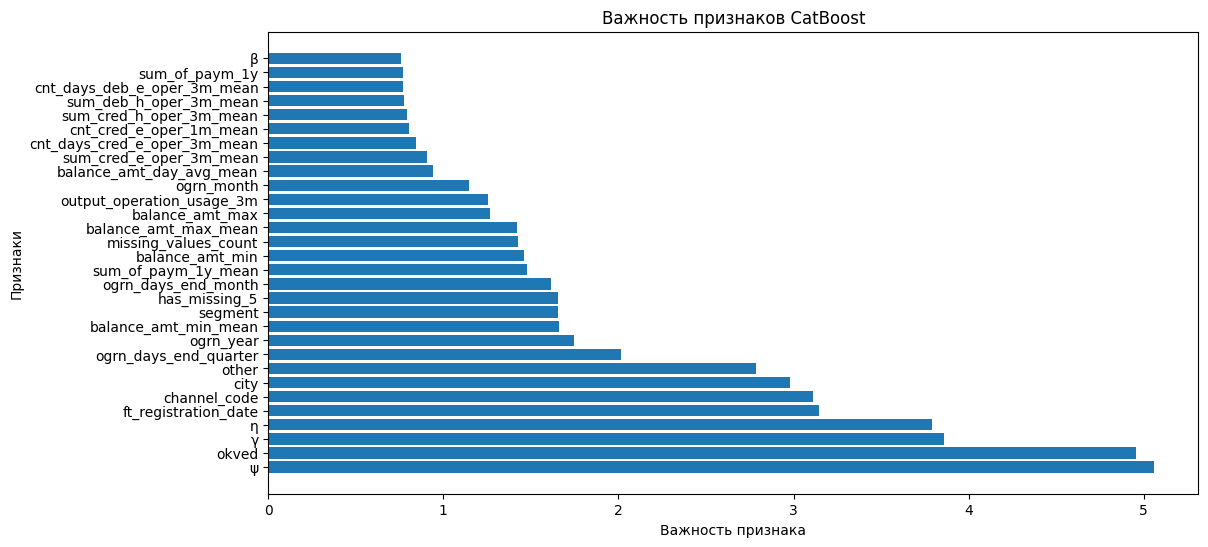

In [148]:
feature_importances = model.get_feature_importance()
feature_importances_df = pd.DataFrame({'features': X.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 6))
feature_importances_df = feature_importances_df[:30]
plt.barh(feature_importances_df['features'], feature_importances_df['importance'])
plt.xlabel('Важность признака')
plt.ylabel('Признаки')
plt.title('Важность признаков CatBoost')
plt.show()

In [149]:
from sklearn.metrics import classification_report
y_pr = model.predict(x_test)
print(classification_report(y_test, y_pr, digits=5))

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     {other}    0.63141   0.55820   0.59255      8995
          {}    0.77086   0.43123   0.55307     20314
      {α, β}    0.55484   0.40326   0.46706      2145
      {α, γ}    0.65856   0.61202   0.63444      6637
      {α, δ}    0.46441   0.17276   0.25184       793
   {α, ε, η}    0.77193   0.27937   0.41026       315
   {α, ε, θ}    0.58537   0.11163   0.18750       215
   {α, ε, ψ}    0.68000   0.24638   0.36170        69
      {α, ε}    0.55322   0.35549   0.43284      1038
      {α, η}    0.74229   0.80062   0.77035      7458
      {α, θ}    0.72920   0.36520   0.48666      1224
      {α, λ}    0.58730   0.22289   0.32314       166
      {α, μ}    0.71605   0.29367   0.41652       395
      {α, π}    0.00000   0.00000   0.00000         4
      {α, ψ}    0.60656   0.53430   0.56814       554
         {α}    0.74478   0.90528   0.81723     59311
         {λ}    0.70000   0.29167   0.41176        24

    accuracy              

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## **Обучение ня всей train выборке**

In [151]:
cat_cols = list(x_train.select_dtypes(include=['object', 'category']).columns)

model = CatBoostClassifier(loss_function='MultiClass',
                           eval_metric='AUC',
                           metric_period=10, 
                           verbose=500, 
                           random_seed=42,
                           task_type='GPU',
                           iterations=4000,
                           depth=4, 
                           learning_rate=0.01,
                           allow_writing_files=False,
                           class_weights=weights_dict)

model.fit(X, y, cat_features=cat_cols)

AUC is not implemented on GPU. Will use CPU for metric computation, this could significantly affect learning time


0:	total: 65ms	remaining: 4m 20s
500:	total: 22.3s	remaining: 2m 35s
1000:	total: 44.8s	remaining: 2m 14s
1500:	total: 1m 7s	remaining: 1m 52s
2000:	total: 1m 29s	remaining: 1m 29s
2500:	total: 1m 51s	remaining: 1m 7s
3000:	total: 2m 14s	remaining: 44.7s
3500:	total: 2m 36s	remaining: 22.3s
3999:	total: 2m 58s	remaining: 0us


## **Прогноз на тестовой выборке**

In [163]:
sample_submission_df = pd.read_csv("sample_submission.csv")
sample_submission_df.head()

,id,{other},{},"{α, β}","{α, γ}","{α, δ}","{α, ε, η}","{α, ε, θ}","{α, ε, ψ}","{α, ε}","{α, η}","{α, θ}","{α, λ}","{α, μ}","{α, π}","{α, ψ}",{α},{λ}
0,200000,0.20,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
1,200001,0.20,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
2,200002,0.20,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
3,200003,0.20,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05
4,200004,0.20,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05


In [164]:
test_clear_df = test_clear_df[test_clear_df["date"] == "month_6"]

In [165]:
test_clear_df.shape

(100000, 190)

In [180]:
X, _ = split_Xy(test_clear_df.drop(columns=['start_cluster']), train=False)

In [179]:
X['end_cluster']

0         {other}
1         {other}
2         {other}
3         {other}
4         {other}
           ...   
599995         {}
599996         {}
599997         {}
599998         {}
599999         {}
Name: end_cluster, Length: 548285, dtype: category
Categories (17, object): ['{other}', '{}', '{α, β}', '{α, γ}', ..., '{α, π}', '{α, ψ}', '{α}', '{λ}']

In [181]:
test_pred_proba = model.predict_proba(X)
test_pred_proba_df = pd.DataFrame(test_pred_proba, columns=model.classes_)
sorted_classes = sorted(test_pred_proba_df.columns.to_list())
test_pred_proba_df = test_pred_proba_df[sorted_classes]

In [182]:
test_pred_proba_df.head()

,{other},{},"{α, β}","{α, γ}","{α, δ}","{α, ε, η}","{α, ε, θ}","{α, ε, ψ}","{α, ε}","{α, η}","{α, θ}","{α, λ}","{α, μ}","{α, π}","{α, ψ}",{α},{λ}
0,0.02,0.01,0.02,0.04,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.01,0.86,0.00
1,0.02,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.57,0.00
2,0.67,0.00,0.01,0.12,0.01,0.00,0.00,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.06,0.05,0.00
3,0.07,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.46,0.00
4,0.08,0.09,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.11,0.00,0.00,0.02,0.00,0.00,0.64,0.00


In [183]:
sample_submission_df[sorted_classes] = test_pred_proba_df
sample_submission_df.head()

,id,{other},{},"{α, β}","{α, γ}","{α, δ}","{α, ε, η}","{α, ε, θ}","{α, ε, ψ}","{α, ε}","{α, η}","{α, θ}","{α, λ}","{α, μ}","{α, π}","{α, ψ}",{α},{λ}
0,200000,0.02,0.01,0.02,0.04,0.01,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.00,0.01,0.86,0.00
1,200001,0.02,0.38,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.00,0.57,0.00
2,200002,0.67,0.00,0.01,0.12,0.01,0.00,0.00,0.03,0.02,0.01,0.01,0.00,0.00,0.00,0.06,0.05,0.00
3,200003,0.07,0.43,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.46,0.00
4,200004,0.08,0.09,0.01,0.02,0.00,0.00,0.00,0.00,0.01,0.11,0.00,0.00,0.02,0.00,0.00,0.64,0.00


In [184]:
sample_submission_df.to_csv("/kaggle/working/submission.csv", index=False)

## **Дополнение. Каскад моделей**

### Каскад из моделей бинарной классификации. Отдельная модель предсказывает склонность и отток по каждому продукту. В перспективе данное решение лушче, но из-за нехватки возможностей и времени мы отказались от этого подхода.


In [ ]:
products = [cl[1:-1].split(',') for cl in train_clear_df.start_cluster.value_counts().index]
products = [pr.strip() for cl in products for pr in cl]
products = set(products)
products, len(products)

In [ ]:
def train_products_open(df):
    new_df = df.copy()
    
    for pt in tqdm(list(products)):
        model = CatBoostClassifier(iterations=2000,
                                   verbose=False,
                                   learning_rate=0.02,
                                   depth=4,
                                   loss_function='Logloss',
                                   random_seed=42,
                                   task_type='GPU')
        
        model.set_params(train_dir='/kaggle/working/catboost_info')
        
        temp_df = new_df.copy()
        temp_df['target'] = temp_df.start_cluster.map(lambda x: 1 if not sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0) * \
                            temp_df.end_cluster.map(lambda x: 1 if sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0)
        
#         temp_df['target'] += temp_df.start_cluster.map(lambda x: 1 if sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0) * \
#                             temp_df.end_cluster.map(lambda x: 1 if sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0)

        X = temp_df.drop(["id", "date", "end_cluster", "target"], axis=1)
        y = temp_df['target']
        cat_cols = list(X.select_dtypes(include=['object', 'category']).columns)

        x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        model.fit(x_train,
                  y_train,
                  cat_features=cat_cols)
        
        print(f'roc_auc: {roc_auc_score(y_val, model.predict(x_val))}\n' + \
              f'precision: {precision_score(y_val, model.predict(x_val))}\n' + \
              f'recall: {recall_score(y_val, model.predict(x_val))}\n' + \
              f'{y.value_counts()}')
        
        model.save_model(f'/kaggle/working/models/catboost_model_open_{pt}.cbm')

In [ ]:
train_products_open(train_clear_df)

In [ ]:
def train_products_close(df):
    new_df = df.copy()
    
    for pt in tqdm(products):
        model = CatBoostClassifier(iterations=2000,
                           verbose=False,
                           learning_rate=0.02,
                           depth=4,
                           loss_function='Logloss',
                           random_seed=42,
                           task_type='GPU')
        
        model.set_params(train_dir='/kaggle/working/catboost_info')
        
        temp_df = new_df.copy()
        temp_df['target'] = temp_df.start_cluster.map(lambda x: 1 if sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0) * \
                            temp_df.end_cluster.map(lambda x: 1 if not sum([pt == i.strip() for i in x[1:-1].split(',')]) else 0)
        
        X = temp_df.drop(["id", "date", "end_cluster", 'target'], axis=1)
        y = temp_df['target']

        cat_cols = list(X.select_dtypes(include=['object', 'category']).columns)
        x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

        model.fit(x_train,
                  y_train,
                  verbose=None,
                  cat_features=cat_cols)
        
        print(f'roc_auc: {roc_auc_score(y_val, model.predict(x_val))}\n' + \
              f'precision: {precision_score(y_val, model.predict(x_val))}\n' + \
              f'recall: {recall_score(y_val, model.predict(x_val))}\n' + \
              f'{y.value_counts()}')
        
        model.save_model(f'/kaggle/working/models/catboost_model_close_{pt}.cbm')

In [ ]:
train_products_close(train_clear_df)

In [ ]:
def proba_products_open(df, train=True):
    new_df = df.copy()
    
    prod_prob_open = {}
    
    for pt in products:    
        if train:
            X = new_df.drop(["id", "date", "end_cluster"], axis=1)
        else:
            X = new_df.drop(["id", "date"], axis=1)

        model = CatBoostClassifier()
        model.load_model(f'/kaggle/working/models/catboost_model_open_{pt}.cbm')
        prod_prob_open[pt] = model.predict_proba(X)[:, 1]
        
    return prod_prob_open

In [ ]:
def proba_products_close(df, train=True):
    new_df = df.copy()
    
    prod_prob_close = {}
    
    for pt in products:       
        if train:
            X = new_df.drop(["id", "date", "end_cluster"], axis=1)
        else:
            X = new_df.drop(["id", "date"], axis=1)

        model = CatBoostClassifier()
        model.load_model(f'/kaggle/working/models/catboost_model_close_{pt}.cbm')
        prod_prob_close[pt] = model.predict_proba(X)[:, 1]
        
    return prod_prob_close

In [ ]:
prod_prob_open = proba_products_open(train_clear_df)
prod_prob_close = proba_products_close(train_clear_df)
for pt in products:
    train_clear_df[f'prob_close_{pt}'] = prod_prob_close[pt]
    train_clear_df[f'prob_open_{pt}'] = prod_prob_open[pt]

In [ ]:
test_clear_df = clear_dataset(test_df, train=False)

prod_prob_open = proba_products_open(test_clear_df, train=False)
prod_prob_close = proba_products_close(test_clear_df, train=False)
for pt in products:
    test_clear_df[f'prob_close_{pt}'] = prod_prob_close[pt]
    test_clear_df[f'prob_open_{pt}'] = prod_prob_open[pt]